In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle
# import nibabel as nib

In [111]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

# Load prepared data

In [60]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [61]:
file_mean = save_path+"fmap_mean_separate_neg.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'neg', 'mean0', 'mean1', 'mean2', 'theory']
data = np.loadtxt(file_mean);

In [62]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "neg": int})
df

,exp,mini_exp,i,j,k,neg,mean0,mean1,mean2,theory
0,32,1,0,0,0,0,0.0,0.0,0.0,0.0
1,32,1,0,0,1,0,0.0,0.0,0.0,0.0
2,32,1,0,0,2,0,0.0,0.0,0.0,0.0
3,32,1,0,0,3,0,0.0,0.0,0.0,0.0
4,32,1,0,0,4,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12255227,39,6,43,63,59,1,0.0,0.0,0.0,0.0
12255228,39,6,43,63,60,1,0.0,0.0,0.0,0.0
12255229,39,6,43,63,61,1,0.0,0.0,0.0,0.0
12255230,39,6,43,63,62,1,0.0,0.0,0.0,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12255232 entries, 0 to 12255231
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   neg       int64  
 6   mean0     float64
 7   mean1     float64
 8   mean2     float64
 9   theory    float64
dtypes: float64(4), int64(6)
memory usage: 935.0 MB


In [64]:
df1_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,theory
5406720,36,6,0,0,0,0.0,0.0,0.0,0.0
5406721,36,6,0,0,1,0.0,0.0,0.0,0.0
5406722,36,6,0,0,2,0.0,0.0,0.0,0.0
5406723,36,6,0,0,3,0.0,0.0,0.0,0.0
5406724,36,6,0,0,4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5767163,36,6,43,63,59,0.0,0.0,0.0,0.0
5767164,36,6,43,63,60,0.0,0.0,0.0,0.0
5767165,36,6,43,63,61,0.0,0.0,0.0,0.0
5767166,36,6,43,63,62,0.0,0.0,0.0,0.0


# Split data

## Data 1. fmap mean all experiments

In [65]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[(df['exp']==36) & (df['mini_exp']==6)]

In [66]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(11534336, 10)
(360448, 10)
(360448, 10)


In [67]:
X1_train = df1_train.iloc[:, 5:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 5:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 5:-1].values 
y1_pred = df1_val['theory'].values

In [68]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(11534336, 4)
(11534336,)
(360448, 4)
(360448,)
(360448, 4)
(360448,)


## Data4: None zero

In [69]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0)]

In [70]:
df_nonzero

,exp,mini_exp,i,j,k,neg,mean0,mean1,mean2,theory
26572,32,1,6,31,12,0,-938.799683,-948.025818,-957.294250,2.563399
26573,32,1,6,31,13,0,-869.659546,-878.644653,-889.680359,2.756330
26574,32,1,6,31,14,0,-758.812622,-766.461914,-778.177979,2.966980
26575,32,1,6,31,15,0,-644.983826,-651.566284,-664.997986,3.197531
26576,32,1,6,31,16,0,-522.547424,-530.130432,-542.555176,3.450627
...,...,...,...,...,...,...,...,...,...,...
12224864,39,6,36,37,32,1,515.168457,516.990173,510.742615,0.232876
12224865,39,6,36,37,33,1,620.068970,602.726990,621.597656,-3.468895
12224866,39,6,36,37,34,1,550.782410,549.108154,549.562561,-3.697875
12224867,39,6,36,37,35,1,560.633911,552.402222,560.008301,-3.526700


In [71]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6)]

In [72]:
X4_train = df4_train.iloc[:, 5:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 5:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 5:-1].values
y4_pred = df4_pred['theory'].values

In [73]:
# print(X.shape)
# print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred.shape)
print(y4_pred.shape)

(2164270, 4)
(2164270,)
(68024, 4)
(68024,)
(68026, 4)
(68026,)


# Run NN

In [53]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [54]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["accuracy"])

In [55]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_neg.h5', verbose=1, save_best_only=True)

In [56]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=[X_test, y_test], callbacks=[checkpointer])

Epoch 1/300
360439/360448 [============================>.] - ETA: 0s - loss: 2626.2849 - accuracy: 0.7654
Epoch 1: val_loss improved from inf to 21.85946, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_norm.h5
360448/360448 [==============================] - 370s 1ms/step - loss: 2626.2195 - accuracy: 0.7654 - val_loss: 21.8595 - val_accuracy: 0.8112
Epoch 2/300
360426/360448 [============================>.] - ETA: 0s - loss: 2621.2356 - accuracy: 0.7302
Epoch 2: val_loss improved from 21.85946 to 20.61890, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_norm.h5
360448/360448 [==============================] - 387s 1ms/step - loss: 2621.0784 - accuracy: 0.7302 - val_loss: 20.6189 - val_accuracy: 0.8114
Epoch 3/300
360429/360448 [============================>.] - ETA: 0s - loss: 2621.6799 - accuracy: 0.7387
Epoch 3: val_loss improved from 20.61890 to 18.55254, saving model to /Users/chikakoo

Epoch 26/300
360439/360448 [============================>.] - ETA: 0s - loss: 2620.0681 - accuracy: 0.7048
Epoch 26: val_loss did not improve from 14.12867
360448/360448 [==============================] - 343s 953us/step - loss: 2620.0027 - accuracy: 0.7048 - val_loss: 21.7032 - val_accuracy: 0.8112
Epoch 27/300
360403/360448 [============================>.] - ETA: 0s - loss: 2620.7729 - accuracy: 0.7177
Epoch 27: val_loss did not improve from 14.12867
360448/360448 [==============================] - 343s 952us/step - loss: 2620.4470 - accuracy: 0.7176 - val_loss: 20.4090 - val_accuracy: 0.8114
Epoch 28/300
360401/360448 [============================>.] - ETA: 0s - loss: 2620.2585 - accuracy: 0.7103
Epoch 28: val_loss did not improve from 14.12867
360448/360448 [==============================] - 344s 953us/step - loss: 2619.9180 - accuracy: 0.7103 - val_loss: 16.9250 - val_accuracy: 0.8114
Epoch 29/300
360400/360448 [============================>.] - ETA: 0s - loss: 2620.1257 - accurac

KeyboardInterrupt: 

In [ ]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
np.corrcoef(test_pred.flatten(), y_test)

In [ ]:
model.summary()

In [ ]:
history.history

## Plot

### Loss function (MSE)

In [ ]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

In [ ]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

# Output data

# Run NN for NonZero

In [74]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [75]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["accuracy"])

In [76]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_neg_nonzero.h5', verbose=1, save_best_only=True)

In [77]:
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=[X_test, y_test], callbacks=[checkpointer])

Epoch 1/300
33816/33817 [============================>.] - ETA: 0s - loss: 14151.4844 - accuracy: 8.0214e-04
Epoch 1: val_loss improved from inf to 144.39200, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_nonzero.h5
33817/33817 [==============================] - 35s 1ms/step - loss: 14151.1885 - accuracy: 8.0212e-04 - val_loss: 144.3920 - val_accuracy: 2.4991e-04
Epoch 2/300
33783/33817 [============================>.] - ETA: 0s - loss: 13952.4434 - accuracy: 2.3588e-04
Epoch 2: val_loss improved from 144.39200 to 115.34660, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_nonzero.h5
33817/33817 [==============================] - 32s 938us/step - loss: 13938.6553 - accuracy: 2.3657e-04 - val_loss: 115.3466 - val_accuracy: 6.6153e-04
Epoch 3/300
33809/33817 [============================>.] - ETA: 0s - loss: 13927.0107 - accuracy: 5.3009e-04
Epoch 3: val_loss improved from 115.34660 to 81.401

Epoch 25/300
33771/33817 [============================>.] - ETA: 0s - loss: 13932.9873 - accuracy: 5.3439e-04
Epoch 25: val_loss did not improve from 68.52352
33817/33817 [==============================] - 33s 969us/step - loss: 13914.6035 - accuracy: 5.3367e-04 - val_loss: 70.9944 - val_accuracy: 2.0581e-04
Epoch 26/300
33775/33817 [============================>.] - ETA: 0s - loss: 13914.5947 - accuracy: 5.3433e-04
Epoch 26: val_loss did not improve from 68.52352
33817/33817 [==============================] - 32s 953us/step - loss: 13911.8750 - accuracy: 5.3413e-04 - val_loss: 74.5504 - val_accuracy: 6.1743e-04
Epoch 27/300
33808/33817 [============================>.] - ETA: 0s - loss: 13917.6992 - accuracy: 5.4120e-04
Epoch 27: val_loss did not improve from 68.52352
33817/33817 [==============================] - 33s 973us/step - loss: 13914.1631 - accuracy: 5.4152e-04 - val_loss: 69.8325 - val_accuracy: 1.4701e-04
Epoch 28/300
33777/33817 [============================>.] - ETA: 0s - 

Epoch 51/300
33789/33817 [============================>.] - ETA: 0s - loss: 13924.4453 - accuracy: 5.4890e-04
Epoch 51: val_loss did not improve from 66.00837
33817/33817 [==============================] - 30s 879us/step - loss: 13913.6377 - accuracy: 5.4938e-04 - val_loss: 68.6968 - val_accuracy: 0.0011
Epoch 52/300
33777/33817 [============================>.] - ETA: 0s - loss: 13930.2285 - accuracy: 5.6945e-04
Epoch 52: val_loss did not improve from 66.00837
33817/33817 [==============================] - 30s 890us/step - loss: 13914.2461 - accuracy: 5.7063e-04 - val_loss: 68.9435 - val_accuracy: 6.0273e-04
Epoch 53/300
33800/33817 [============================>.] - ETA: 0s - loss: 13920.6338 - accuracy: 5.7045e-04
Epoch 53: val_loss did not improve from 66.00837
33817/33817 [==============================] - 30s 898us/step - loss: 13913.7666 - accuracy: 5.7017e-04 - val_loss: 69.4938 - val_accuracy: 6.1743e-04
Epoch 54/300
33809/33817 [============================>.] - ETA: 0s - loss

Epoch 78/300
33804/33817 [============================>.] - ETA: 0s - loss: 13918.1289 - accuracy: 5.7269e-04
Epoch 78: val_loss did not improve from 66.00837
33817/33817 [==============================] - 30s 884us/step - loss: 13913.0107 - accuracy: 5.7248e-04 - val_loss: 72.7157 - val_accuracy: 0.0011
Epoch 79/300
33766/33817 [============================>.] - ETA: 0s - loss: 13932.7539 - accuracy: 5.6640e-04
Epoch 79: val_loss did not improve from 66.00837
33817/33817 [==============================] - 30s 882us/step - loss: 13912.2139 - accuracy: 5.6601e-04 - val_loss: 71.0852 - val_accuracy: 5.4393e-04
Epoch 80/300
33787/33817 [============================>.] - ETA: 0s - loss: 13924.8408 - accuracy: 5.8454e-04
Epoch 80: val_loss did not improve from 66.00837
33817/33817 [==============================] - 30s 884us/step - loss: 13912.9219 - accuracy: 5.8449e-04 - val_loss: 68.8064 - val_accuracy: 6.1743e-04
Epoch 81/300
33801/33817 [============================>.] - ETA: 0s - loss

33805/33817 [============================>.] - ETA: 0s - loss: 13915.9717 - accuracy: 5.7314e-04
Epoch 104: val_loss did not improve from 64.77641
33817/33817 [==============================] - 32s 954us/step - loss: 13911.1631 - accuracy: 5.7294e-04 - val_loss: 67.7634 - val_accuracy: 0.0010
Epoch 105/300
33787/33817 [============================>.] - ETA: 0s - loss: 13924.8672 - accuracy: 5.5911e-04
Epoch 105: val_loss improved from 64.77641 to 64.56902, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_nonzero.h5
33817/33817 [==============================] - 31s 924us/step - loss: 13912.8574 - accuracy: 5.5954e-04 - val_loss: 64.5690 - val_accuracy: 6.6153e-04
Epoch 106/300
33799/33817 [============================>.] - ETA: 0s - loss: 13916.7930 - accuracy: 5.7463e-04
Epoch 106: val_loss did not improve from 64.56902
33817/33817 [==============================] - 30s 889us/step - loss: 13909.5713 - accuracy: 5.7525e-04 - val_loss: 78.2

33814/33817 [============================>.] - ETA: 0s - loss: 13912.0635 - accuracy: 5.7345e-04
Epoch 130: val_loss did not improve from 64.56902
33817/33817 [==============================] - 30s 885us/step - loss: 13910.9932 - accuracy: 5.7340e-04 - val_loss: 79.8377 - val_accuracy: 5.5863e-04
Epoch 131/300
33814/33817 [============================>.] - ETA: 0s - loss: 13914.0293 - accuracy: 5.8084e-04
Epoch 131: val_loss did not improve from 64.56902
33817/33817 [==============================] - 30s 888us/step - loss: 13912.9688 - accuracy: 5.8080e-04 - val_loss: 78.8352 - val_accuracy: 5.4393e-04
Epoch 132/300
33778/33817 [============================>.] - ETA: 0s - loss: 13926.7979 - accuracy: 5.6527e-04
Epoch 132: val_loss did not improve from 64.56902
33817/33817 [==============================] - 30s 884us/step - loss: 13910.9688 - accuracy: 5.6693e-04 - val_loss: 71.2949 - val_accuracy: 0.0011
Epoch 133/300
33799/33817 [============================>.] - ETA: 0s - loss: 13919

33790/33817 [============================>.] - ETA: 0s - loss: 13924.5039 - accuracy: 5.3640e-04
Epoch 156: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 888us/step - loss: 13915.8896 - accuracy: 5.3644e-04 - val_loss: 71.3766 - val_accuracy: 0.0011
Epoch 157/300
33772/33817 [============================>.] - ETA: 0s - loss: 13929.0635 - accuracy: 5.3206e-04
Epoch 157: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 882us/step - loss: 13911.0713 - accuracy: 5.3182e-04 - val_loss: 67.9198 - val_accuracy: 0.0011
Epoch 158/300
33793/33817 [============================>.] - ETA: 0s - loss: 13922.5527 - accuracy: 5.4283e-04
Epoch 158: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 883us/step - loss: 13912.9287 - accuracy: 5.4337e-04 - val_loss: 76.3633 - val_accuracy: 1.6171e-04
Epoch 159/300
33797/33817 [============================>.] - ETA: 0s - loss: 13918.856

33817/33817 [==============================] - 32s 951us/step - loss: 13912.0127 - accuracy: 5.5446e-04 - val_loss: 73.6568 - val_accuracy: 6.0273e-04
Epoch 183/300
33817/33817 [==============================] - ETA: 0s - loss: 13916.4180 - accuracy: 5.3875e-04
Epoch 183: val_loss did not improve from 64.35678
33817/33817 [==============================] - 33s 970us/step - loss: 13916.4180 - accuracy: 5.3875e-04 - val_loss: 74.6815 - val_accuracy: 6.0273e-04
Epoch 184/300
33780/33817 [============================>.] - ETA: 0s - loss: 13911.4287 - accuracy: 5.4581e-04
Epoch 184: val_loss did not improve from 64.35678
33817/33817 [==============================] - 33s 964us/step - loss: 13910.2822 - accuracy: 5.4522e-04 - val_loss: 71.2232 - val_accuracy: 0.0012
Epoch 185/300
33802/33817 [============================>.] - ETA: 0s - loss: 13917.1162 - accuracy: 5.3991e-04
Epoch 185: val_loss did not improve from 64.35678
33817/33817 [==============================] - 33s 962us/step - loss

Epoch 209/300
33816/33817 [============================>.] - ETA: 0s - loss: 13914.8379 - accuracy: 5.5077e-04
Epoch 209: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 883us/step - loss: 13914.5430 - accuracy: 5.5076e-04 - val_loss: 75.8250 - val_accuracy: 1.4701e-04
Epoch 210/300
33803/33817 [============================>.] - ETA: 0s - loss: 13917.0332 - accuracy: 5.5099e-04
Epoch 210: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 882us/step - loss: 13911.4531 - accuracy: 5.5076e-04 - val_loss: 71.7786 - val_accuracy: 6.0273e-04
Epoch 211/300
33793/33817 [============================>.] - ETA: 0s - loss: 13923.2158 - accuracy: 5.4930e-04
Epoch 211: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 884us/step - loss: 13913.4922 - accuracy: 5.4938e-04 - val_loss: 71.4400 - val_accuracy: 1.4701e-04
Epoch 212/300
33798/33817 [============================>.] - ETA

33817/33817 [==============================] - 31s 926us/step - loss: 13915.7549 - accuracy: 5.4383e-04 - val_loss: 67.8846 - val_accuracy: 6.9093e-04
Epoch 236/300
33787/33817 [============================>.] - ETA: 0s - loss: 13924.7197 - accuracy: 5.3136e-04
Epoch 236: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 880us/step - loss: 13912.5664 - accuracy: 5.3089e-04 - val_loss: 67.4514 - val_accuracy: 1.6171e-04
Epoch 237/300
33801/33817 [============================>.] - ETA: 0s - loss: 13919.1807 - accuracy: 5.4963e-04
Epoch 237: val_loss did not improve from 64.35678
33817/33817 [==============================] - 29s 869us/step - loss: 13913.2139 - accuracy: 5.4938e-04 - val_loss: 72.7324 - val_accuracy: 6.1743e-04
Epoch 238/300
33788/33817 [============================>.] - ETA: 0s - loss: 13925.5693 - accuracy: 5.3458e-04
Epoch 238: val_loss did not improve from 64.35678
33817/33817 [==============================] - 29s 868us/step - 

Epoch 262/300
33808/33817 [============================>.] - ETA: 0s - loss: 13916.4229 - accuracy: 5.4351e-04
Epoch 262: val_loss did not improve from 64.35678
33817/33817 [==============================] - 30s 880us/step - loss: 13912.8672 - accuracy: 5.4337e-04 - val_loss: 66.1845 - val_accuracy: 0.0012
Epoch 263/300
33766/33817 [============================>.] - ETA: 0s - loss: 13934.3223 - accuracy: 5.3447e-04
Epoch 263: val_loss improved from 64.35678 to 64.19669, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_nonzero.h5
33817/33817 [==============================] - 30s 890us/step - loss: 13913.7451 - accuracy: 5.3413e-04 - val_loss: 64.1967 - val_accuracy: 1.4701e-04
Epoch 264/300
33814/33817 [============================>.] - ETA: 0s - loss: 13913.6191 - accuracy: 5.1846e-04
Epoch 264: val_loss did not improve from 64.19669
33817/33817 [==============================] - 30s 881us/step - loss: 13912.5020 - accuracy: 5.1842e-04 - 

Epoch 288/300
33814/33817 [============================>.] - ETA: 0s - loss: 13914.9756 - accuracy: 5.4665e-04
Epoch 288: val_loss did not improve from 64.19669
33817/33817 [==============================] - 32s 945us/step - loss: 13913.8594 - accuracy: 5.4660e-04 - val_loss: 73.6966 - val_accuracy: 1.6171e-04
Epoch 289/300
33797/33817 [============================>.] - ETA: 0s - loss: 13921.4932 - accuracy: 5.4184e-04
Epoch 289: val_loss did not improve from 64.19669
33817/33817 [==============================] - 32s 955us/step - loss: 13913.6445 - accuracy: 5.4198e-04 - val_loss: 65.1560 - val_accuracy: 7.0563e-04
Epoch 290/300
33773/33817 [============================>.] - ETA: 0s - loss: 13931.5039 - accuracy: 5.3297e-04
Epoch 290: val_loss did not improve from 64.19669
33817/33817 [==============================] - 32s 936us/step - loss: 13913.7090 - accuracy: 5.3413e-04 - val_loss: 66.3688 - val_accuracy: 2.4991e-04
Epoch 291/300
33775/33817 [============================>.] - ETA

In [78]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

67634/67634 [==============================] - 46s 677us/step
13909.080641258142
0.5873252624061182
2126/2126 [==============================] - 1s 670us/step
77.21182095246685
0.4862862209709192


In [79]:
model.evaluate(X_test, y_test)

2126/2126 [==============================] - 2s 836us/step - loss: 77.2119 - accuracy: 0.0011


[77.21187591552734, 0.0011466541327536106]

In [80]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.87549866],
       [0.87549866, 1.        ]])

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 25        
                                                                 
 dense_15 (Dense)            (None, 5)                 30        
                                                                 
 dense_16 (Dense)            (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [82]:
history.history

{'loss': [14151.1884765625,
  13938.6552734375,
  13923.845703125,
  13918.97265625,
  13917.20703125,
  13915.4208984375,
  13914.1875,
  13914.5576171875,
  13914.724609375,
  13916.17578125,
  13913.4921875,
  13914.90234375,
  13913.8603515625,
  13913.1279296875,
  13914.6650390625,
  13913.9638671875,
  13914.7373046875,
  13913.7978515625,
  13912.8076171875,
  13915.001953125,
  13914.0712890625,
  13912.98828125,
  13910.5947265625,
  13911.421875,
  13914.603515625,
  13911.875,
  13914.1630859375,
  13911.73828125,
  13914.673828125,
  13913.0986328125,
  13914.3486328125,
  13913.8544921875,
  13912.3671875,
  13911.2080078125,
  13910.759765625,
  13912.8466796875,
  13912.9619140625,
  13911.9658203125,
  13911.2177734375,
  13913.0048828125,
  13911.5576171875,
  13912.72265625,
  13912.30859375,
  13913.111328125,
  13914.7705078125,
  13911.326171875,
  13911.869140625,
  13913.8701171875,
  13909.9990234375,
  13913.4921875,
  13913.6376953125,
  13914.24609375,
  139

## Plot

### Loss function (MSE)

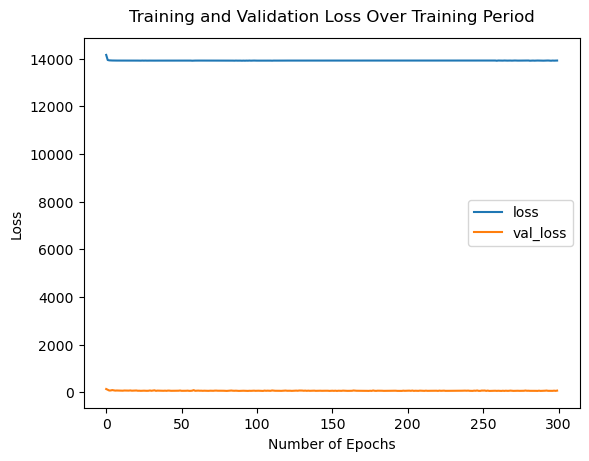

In [83]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

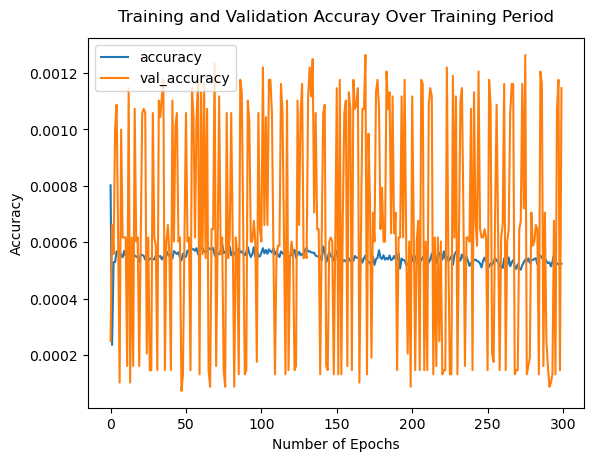

In [84]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

# Plot

### Theory vs Predict

In [85]:
test_pred = model.predict(X4_pred)

2126/2126 [==============================] - 2s 710us/step


r: 0.86872, st_er: 0.001420
y = 0.6495*x + 0.5808


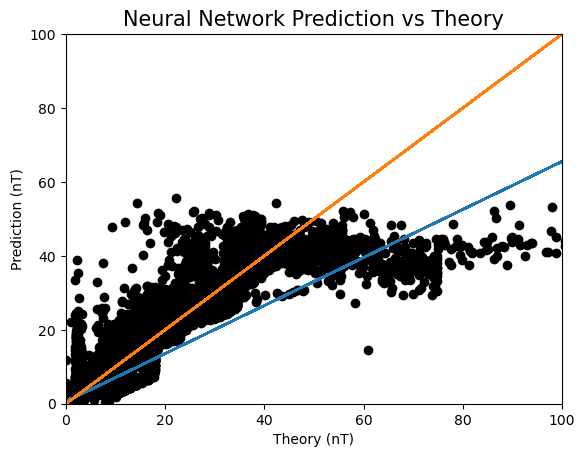

In [122]:
x = y4_pred.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y4_pred, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [92]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_73732/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [93]:
df4_pred

,exp,mini_exp,i,j,k,neg,mean0,mean1,mean2,theory,predict
5437480,36,6,7,32,40,0,-183.593781,-184.268631,-199.538742,4.988159,7.808805
5437481,36,6,7,32,41,0,-383.761566,-383.066467,-395.916077,4.591202,6.231605
5437482,36,6,7,32,42,0,-779.052185,-785.270813,-803.943787,4.237324,3.629173
5437483,36,6,7,32,43,0,-1017.557312,-1026.294189,-1037.133667,3.918999,3.150548
5437519,36,6,7,33,15,0,-1508.948120,-1513.032471,-1527.041992,3.371496,2.890051
...,...,...,...,...,...,...,...,...,...,...,...
5736792,36,6,36,37,24,1,-46.617607,-59.281792,-58.657875,-7.175758,-6.509609
5736803,36,6,36,37,35,1,151.715485,130.792816,139.797287,-8.527348,-13.236750
5736806,36,6,36,37,38,1,-115.256683,-131.555984,-127.650993,-6.039019,-8.545076
5736807,36,6,36,37,39,1,-253.580444,-268.104340,-266.388824,-5.501382,-6.692966


In [96]:
df1_test

,exp,mini_exp,i,j,k,neg,mean0,mean1,mean2,theory
5406720,36,6,0,0,0,0,0.0,0.0,0.0,0.0
5406721,36,6,0,0,1,0,0.0,0.0,0.0,0.0
5406722,36,6,0,0,2,0,0.0,0.0,0.0,0.0
5406723,36,6,0,0,3,0,0.0,0.0,0.0,0.0
5406724,36,6,0,0,4,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5767163,36,6,43,63,59,1,0.0,0.0,0.0,0.0
5767164,36,6,43,63,60,1,0.0,0.0,0.0,0.0
5767165,36,6,43,63,61,1,0.0,0.0,0.0,0.0
5767166,36,6,43,63,62,1,0.0,0.0,0.0,0.0


In [99]:
df1_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_73732/549603398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test['predict'] = 0.00


In [100]:
df_out = df1_test[['i', 'j', 'k', 'neg', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'neg', 'predict']]

In [91]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360448 entries, 5406720 to 5767167
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   i        360448 non-null  int64  
 1   j        360448 non-null  int64  
 2   k        360448 non-null  int64  
 3   predict  360448 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 21.8 MB


In [102]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    neg = df_pre.iloc[x, :]['neg'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k) & (df_out['neg']==neg)].index
    df_out.loc[idx, 'predict']= pred

In [103]:
df_pre

,i,j,k,neg,predict
5437480,7,32,40,0,7.808805
5437481,7,32,41,0,6.231605
5437482,7,32,42,0,3.629173
5437483,7,32,43,0,3.150548
5437519,7,33,15,0,2.890051
...,...,...,...,...,...
5736792,36,37,24,1,-6.509609
5736803,36,37,35,1,-13.236750
5736806,36,37,38,1,-8.545076
5736807,36,37,39,1,-6.692966


In [104]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,neg,predict
5437480,7,32,40,0,7.808805
5617704,7,32,40,1,-6.869445


In [106]:
df_out

,i,j,k,neg,predict
5406720,0,0,0,0,0.0
5406721,0,0,1,0,0.0
5406722,0,0,2,0,0.0
5406723,0,0,3,0,0.0
5406724,0,0,4,0,0.0
...,...,...,...,...,...
5767163,43,63,59,1,0.0
5767164,43,63,60,1,0.0
5767165,43,63,61,1,0.0
5767166,43,63,62,1,0.0


In [107]:
df_pos = df_out[df_out['neg']==0]
df_neg = df_out[df_out['neg']==1]

In [109]:
np.savetxt(img_path+"nn_neg_nonzero_pos.txt", df_pos[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")
np.savetxt(img_path+"nn_neg_nonzero_neg.txt", df_neg[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")